In [83]:
import sys


In [84]:
!{sys.executable} -m conda install descartes

C:\Users\rvil\AppData\Local\Continuum\anaconda3\envs\Panda\python.exe: No module named conda


In [85]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [86]:
df= gpd.read_file("csv/neighbourhoods.geojson")


In [87]:
map=gpd.read_file("csv/neighbourhoods.geojson")
map

,neighbourhood,neighbourhood_group,geometry
0,Leopoldstadt,None,"MULTIPOLYGON (((16.38484 48.22616, 16.38495 48..."
1,Landstra§e,None,"MULTIPOLYGON (((16.38681 48.21271, 16.38683 48..."
2,Innere Stadt,None,"MULTIPOLYGON (((16.36497 48.21590, 16.36498 48..."
3,Brigittenau,None,"MULTIPOLYGON (((16.38595 48.24764, 16.38611 48..."
4,Floridsdorf,None,"MULTIPOLYGON (((16.37817 48.28858, 16.37819 48..."
5,Donaustadt,None,"MULTIPOLYGON (((16.48378 48.17615, 16.48358 48..."
6,Liesing,None,"MULTIPOLYGON (((16.33924 48.15405, 16.33948 48..."
7,Alsergrund,None,"MULTIPOLYGON (((16.34255 48.21837, 16.34259 48..."
8,Penzing,None,"MULTIPOLYGON (((16.27508 48.21508, 16.27512 48..."
9,Mariahilf,None,"MULTIPOLYGON (((16.34200 48.19634, 16.34424 48..."


In [88]:
type(df)

geopandas.geodataframe.GeoDataFrame

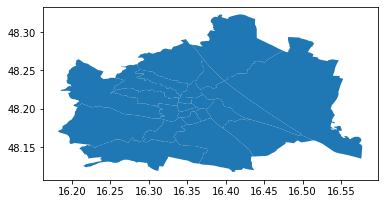

In [89]:
df.plot()

In [90]:
geo=df

In [91]:
df=pd.read_csv('listingsS.csv')
df

,Unnamed: 0,id,name,reviews_per_month,neighbourhood,longitude,latitude
0,0,15883,b&b near Old Danube river,0.18,Donaustadt,16.42812,48.24144
1,1,38768,central cityapartement- wifi- nice neighbourhood,2.87,Leopoldstadt,16.37926,48.21823
2,2,40625,"Near Palace Schönbrunn, Apt. 1",1.32,Rudolfsheim-Fünfhaus,16.32740,48.18486
3,3,51287,little studio- next to citycenter- wifi- nice ...,2.62,Leopoldstadt,16.37781,48.21851
4,4,70568,apartment2rent - UNO City - Danube,0.10,Donaustadt,16.42460,48.22224
...,...,...,...,...,...,...,...
12610,12610,40227279,UNITED NATIONS VIENNA APARTMENT 4,NaN,NaN,16.42110,48.23537
12611,12611,40227463,Studio Apartment 1 minute walk from the U-Bahn,NaN,NaN,16.38119,48.16821
12612,12612,40228112,UNITED NATIONS APARTMENT VIENNA 15,NaN,NaN,16.42110,48.23537
12613,12613,40228638,Tolle Wohnung mit Dachterrasse mitten in Wien,NaN,NaN,16.34856,48.20040


In [92]:
df.isnull()

,Unnamed: 0,id,name,reviews_per_month,neighbourhood,longitude,latitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
12610,False,False,False,True,True,False,False
12611,False,False,False,True,True,False,False
12612,False,False,False,True,True,False,False
12613,False,False,False,True,True,False,False


In [93]:
df['coordinates']=df[['longitude','latitude']].values.tolist()
df.head()

,Unnamed: 0,id,name,reviews_per_month,neighbourhood,longitude,latitude,coordinates
0,0,15883,b&b near Old Danube river,0.18,Donaustadt,16.42812,48.24144,"[16.42812, 48.24144]"
1,1,38768,central cityapartement- wifi- nice neighbourhood,2.87,Leopoldstadt,16.37926,48.21823,"[16.379260000000002, 48.21823]"
2,2,40625,"Near Palace Schönbrunn, Apt. 1",1.32,Rudolfsheim-Fünfhaus,16.32740,48.18486,"[16.3274, 48.18486]"
3,3,51287,little studio- next to citycenter- wifi- nice ...,2.62,Leopoldstadt,16.37781,48.21851,"[16.37781, 48.21851]"
4,4,70568,apartment2rent - UNO City - Danube,0.10,Donaustadt,16.42460,48.22224,"[16.4246, 48.22224]"


In [94]:
df['coordinates']=df['coordinates'].apply(Point)
df.head()

,Unnamed: 0,id,name,reviews_per_month,neighbourhood,longitude,latitude,coordinates
0,0,15883,b&b near Old Danube river,0.18,Donaustadt,16.42812,48.24144,POINT (16.42812 48.24144)
1,1,38768,central cityapartement- wifi- nice neighbourhood,2.87,Leopoldstadt,16.37926,48.21823,POINT (16.37926 48.21823)
2,2,40625,"Near Palace Schönbrunn, Apt. 1",1.32,Rudolfsheim-Fünfhaus,16.32740,48.18486,POINT (16.3274 48.18486)
3,3,51287,little studio- next to citycenter- wifi- nice ...,2.62,Leopoldstadt,16.37781,48.21851,POINT (16.37781 48.21851)
4,4,70568,apartment2rent - UNO City - Danube,0.10,Donaustadt,16.42460,48.22224,POINT (16.4246 48.22224)


In [95]:
type(df)

pandas.core.frame.DataFrame

In [96]:
type(df['coordinates'])

pandas.core.series.Series

In [100]:
df=geopandas.GeoDataFrame(df, geometry='coordinates')
df.head()
df.to_csv('finalG.csv')

In [101]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [102]:
type(df['coordinates'])

geopandas.geoseries.GeoSeries

In [ ]:
test=df

In [ ]:
test=test[test['neighbourhood']=='Donaustadt']


In [ ]:
test

In [ ]:
test.plot(figsize=(20,10))

In [ ]:
test['neighbourhood'].isnull().count()

In [ ]:
test=test.dropna()

In [ ]:
fig, ax=plt.subplots(1, figsize=(30,20))
base=map['geometry'].plot(ax=ax, color='darkblue')
df.plot(ax=base, color='red', markersize=10)

In [ ]:
type(df.geometry)